# Using ChatGPT For An End-to-End Data Science Project
https://www.datacamp.com/tutorial/chatgpt-data-science-projects

### Project Planning

Prompt: “I have a loan dataset consisting of 9500 rows and 14 columns: ['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc','dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']. Can you list the steps I have to follow to develop an end-to-end project for my portfolio.”

We did get the list, but we forgot to mention the class imbalance issue and the project goal, which is to accurately predict “loan not paid back”. 

**Updated Prompt:** “Please include class imbalance issues and accurately predict whether a loan will not be paid back rather than if a loan is paid back.”

Again, we are not interested in model monitoring, and we want to build a Gradio app and deploy it on Huggingface Spaces. 

**Updated Prompt:** “We will be creating a web app using Gradio and deploying it on Spaces and we won't be monitoring the model in the production.”


### Exploratory Data Analysis
**Follow-Up Prompt:** “Please write a Python code to load and perform Exploratory data analysis (EDA) on loan dataset”

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan_df = pd.read_csv("Data/loan_data.csv")

loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [2]:
# Display the number of rows and columns in the dataset
print("Number of rows and columns:", loan_df.shape)

# Display summary statistics for numerical variables
print(loan_df.describe())

Number of rows and columns: (9578, 14)
       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.3756

In [3]:
print(loan_df.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


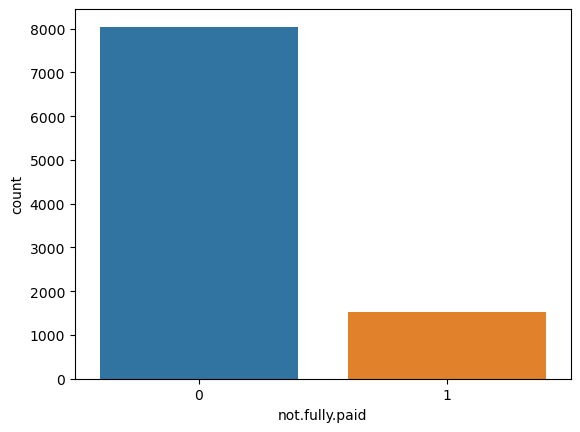

In [4]:
sns.countplot(x="not.fully.paid", data=loan_df)
plt.show()

C:\Users\mhuh22\AppData\Local\Temp\ipykernel_17252\803249505.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = loan_df.corr()


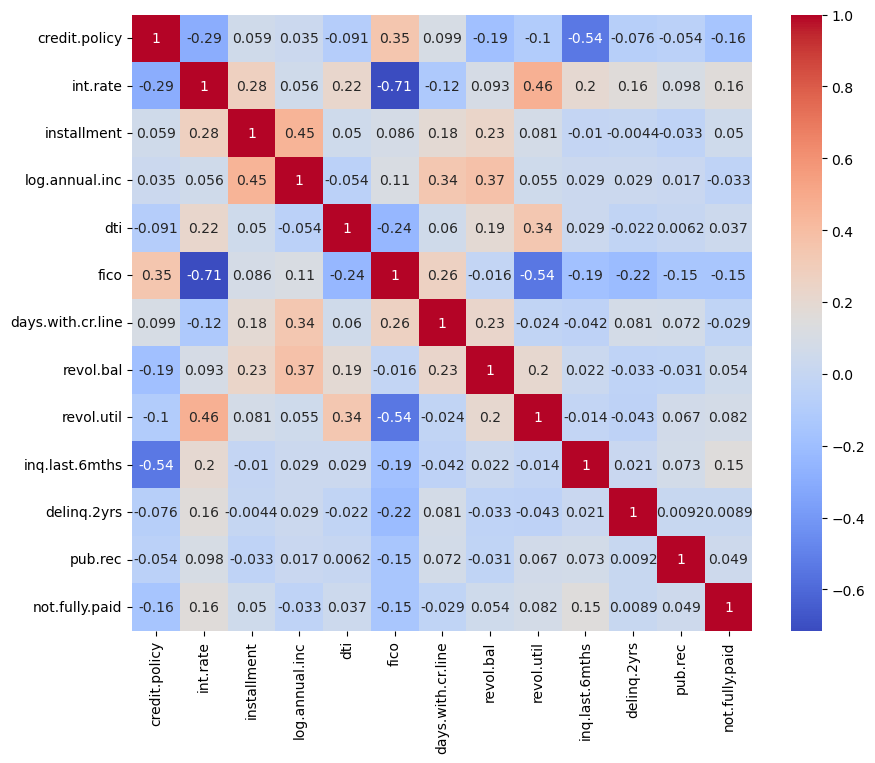

In [5]:
# Increase the size of the figure
plt.figure(figsize=(10, 8))  # Adjust the width and height as per your preference

corr = loan_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

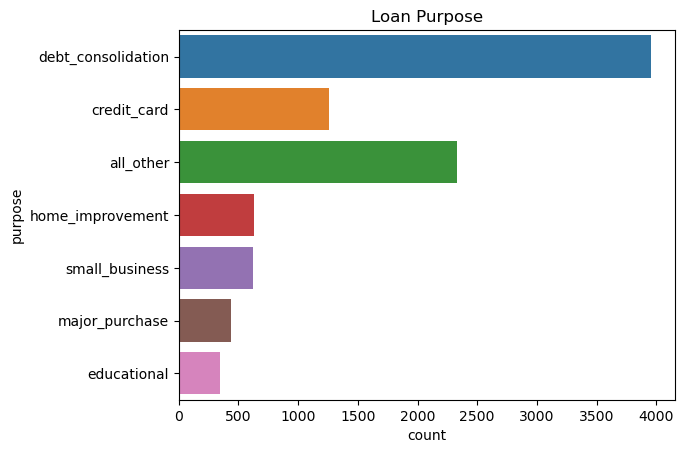

In [6]:
sns.countplot(y="purpose", data=loan_df, orient='h')  # Set orient='h' for horizontal display
plt.xticks(rotation=0)  # Adjust the rotation as per your preference
plt.title('Loan Purpose')
plt.show()

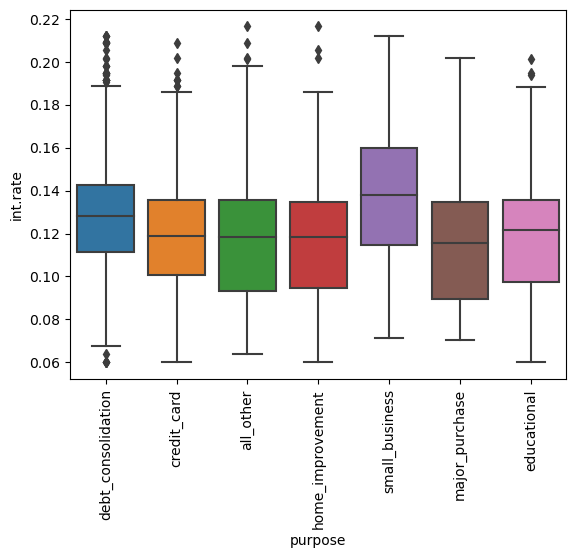

In [7]:
sns.boxplot(x="purpose", y="int.rate", data=loan_df)
plt.xticks(rotation=90)
plt.show()

### Feature Engineering
Instead of preprocessing and cleaning the data, we will perform feature engineering to simplify the preprocessing task. 

**Follow-up Prompt:** “Write a Python code to perform feature engineering”

We did get the right solution, but it included irrelevant code, so we had to write an update prompt to modify the code. 

**Updated Prompt:** “only add feature engineering part.”

In [8]:
# Perform feature engineering
loan_df["installment_to_income_ratio"] = (
    loan_df["installment"] / loan_df["log.annual.inc"]
)
loan_df["credit_history"] = (loan_df["delinq.2yrs"] + loan_df["pub.rec"]) / loan_df[
    "fico"
]

### Preprocessing and Balancing the Data
Again, ChatGPT knows the context of the project. We don't have to explain everything again. So, we will simply ask it to write a Python code to clean and preprocess the data. 

**Follow-up Prompt:** “Now write a python code to clean and preprocess the dataset”

Dropping unnecessary columns and converting the categorical variables to numerical ones.

In [9]:
# Drop unnecessary columsn, and convert categorical variables to numerical
from sklearn.preprocessing import LabelEncoder, StandardScaler

loan_df = loan_df.drop(['credit.policy', 'days.with.cr.line', 'purpose'], axis=1)

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
loan_df['not.fully.paid'] = le.fit_transform(loan_df['not.fully.paid'])

In [10]:
scaler = StandardScaler()
numerical_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec','credit_history','installment_to_income_ratio']
loan_df[numerical_cols] = scaler.fit_transform(loan_df[numerical_cols])

In [11]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X = loan_df.drop('not.fully.paid', axis=1)
y = loan_df['not.fully.paid']

X_resampled, y_resampled = sm.fit_resample(X, y)

loan_df = pd.concat([X_resampled, y_resampled], axis=1)
loan_df['not.fully.paid'].value_counts()

0    8045
1    8045
Name: not.fully.paid, dtype: int64

### Model Selection

**Follow-up Prompt:** “Write a follow-up python code for model selection. Try decision trees, random forests, logistic regression, or support vector machines (SVM). Note: only include the model selection part.”

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X = loan_df.drop('not.fully.paid', axis=1)
y = loan_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit and evaluate decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(dt_score*100))

# Fit and evaluate random forest classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classifier Accuracy: {:.2f}%".format(rf_score*100))

# Fit and evaluate logistic regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Logistic Regression Classifier Accuracy: {:.2f}%".format(lr_score*100))

# Fit and evaluate support vector machine classifier
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print("Support Vector Machine Classifier Accuracy: {:.2f}%".format(svm_score*100))

Decision Tree Classifier Accuracy: 81.21%
Random Forest Classifier Accuracy: 89.14%
Logistic Regression Classifier Accuracy: 61.32%
Support Vector Machine Classifier Accuracy: 66.54%


### Hyperparameter Tuning and Model Evaluation 
We will be selecting the better-performing model and performing the model evaluation. We have specified the use of accuracy, precision, recall, and F1 score as metrics and cross-validation to ensure the model stability.

**Follow-up Prompt:** “Select RandomForestClassifier and write a python code for model evaluation. Use accuracy, precision, recall, and F1 score as metric and cross-validation to ensure the model is not overfitting to the training data.”

We will update the Python to add hyperparameter tuning tasks and save the best-performing model. 

**Updated Prompt:** “also include hyperparameter tuning in the above code and save the best-performing model”

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Perform grid search with cross-validation to find the best hyperparameters
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Random Forest Classifier Evaluation Results:")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Best hyperparameters:", best_params)

Random Forest Classifier Evaluation Results:
Accuracy: 89.39%
Precision: 89.79%
Recall: 88.59%
F1 Score: 89.18%
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [20]:
import joblib
# Save the best model to disk
joblib.dump(best_model, 'loan_classifier.joblib')

['loan_classifier.joblib']

### Creating a Web App using Gradio
Now comes the most fun part. We will only use prompts to create a fully customizable web app that will take numerical input and display the results using a machine-learning model. 

ChatGPT already knows the context, so we need to just ask it to write a Gradio web app for the loan data classifier. 

**Follow-up Prompt:** “Write the Python code to create a Gradio web app for loan data classifiers. We are not using columns ['credit.policy', 'days.with.cr.line', 'purpose'].”

Ask ChatGPT to only include the Gradio app part instead of training and then the inference script. 

**Updated Prompt:** “just include the gradio app part.”

The code we got displays the predictive class probability, and we want to show classification labels. 

**Updated Prompt:** “modify the code to show classification instead of class probabilities.”

After running the code, we have seen multiple warnings and errors. You can improve it by mentioning the errors to ChatGPT. 

We need to understand the limitations of ChatGPT. It was trained on an old dataset, and if you are expecting it to update the code with the latest API, you will hit the wall. Instead, we must read the Gradio documentation and update the code manually. 

**Failed Prompt:** “update the Gradio code with component from gradio.components”

In the Gradio app, we are loading the saved model and getting the inputs from users to display model predictions. 

Learn how Gradio works by reading the Gradio Docs.

In [21]:
import gradio as gr
import joblib
# Load the trained model
model = joblib.load("loan_classifier.joblib")


def predict_loan_status(
    int_rate,
    installment,
    log_annual_inc,
    dti,
    fico,
    revol_bal,
    revol_util,
    inq_last_6mths,
    delinq_2yrs,
    pub_rec,
    installment_to_income_ratio,
    credit_history,
):
    input_dict = {
        "int.rate": int_rate,
        "installment": installment,
        "log.annual.inc": log_annual_inc,
        "dti": dti,
        "fico": fico,
        "revol.bal": revol_bal,
        "revol.util": revol_util,
        "inq.last.6mths": inq_last_6mths,
        "delinq.2yrs": delinq_2yrs,
        "pub.rec": pub_rec,
        "installment_to_income_ratio": installment_to_income_ratio,
        "credit_history": credit_history,
    }
    # Convert the dictionary to a 2D array
    input_array = [list(input_dict.values())]
    prediction = model.predict(input_array)[0]

    if prediction == 0:
        return "Loan fully paid"
    else:
        return "Loan not fully paid"


inputs = [
    gr.Slider(0.06, 0.23, step=0.01, label="Interest Rate"),
    gr.Slider(100, 950, step=10, label="Installment"),
    gr.Slider(7, 15, step=0.1, label="Log Annual Income"),
    gr.Slider(0, 40, step=1, label="DTI Ratio"),
    gr.Slider(600, 850, step=1, label="FICO Score"),
    gr.Slider(0, 120000, step=1000, label="Revolving Balance"),
    gr.Slider(0, 120, step=1, label="Revolving Utilization"),
    gr.Slider(0, 10, step=1, label="Inquiries in Last 6 Months"),
    gr.Slider(0, 20, step=1, label="Delinquencies in Last 2 Years"),
    gr.Slider(0, 10, step=1, label="Public Records"),
    gr.Slider(0, 5, step=0.1, label="Installment to Income Ratio"),
    gr.Slider(0, 1, step=0.01, label="Credit History"),
]
outputs = [gr.Label(num_top_classes=2)]

title = "Loan Approval Classifier"
description = (
    "Enter the details of the loan applicant to check if the loan is approved or not."
)
gr.Interface(
    fn=predict_loan_status,
    inputs=inputs,
    outputs=outputs,
    title=title,
    description=description,
).launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\Users\mhuh22\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
